# 1.1 Loading the Data

In [286]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [287]:
# import as pandas dataframe
day_df = pd.read_csv("./Bike Sharing Dataset/day.csv")

In [288]:
# explore data

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [289]:
# get number of samples (rows), number of features (columns), feature names, and data types

print(f"Number of samples: {day_df.shape[0]}")
print(f"Number of features: {day_df.shape[1]}") # NOTE: we don't believe that "instant" 
                                                # counts as a feature, but it is still counted here

# feature names
print(f"Feature names: {', '.join(day_df.columns)}") # NOTE: "instant" is still listed here as well

# determine datatypes for each feature
data_types = [str(x) for x in day_df.dtypes]
print(f"Data types: {', '.join(data_types)}")

Number of samples: 731
Number of features: 16
Feature names: instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Data types: int64, object, int64, int64, int64, int64, int64, int64, int64, float64, float64, float64, float64, int64, int64, int64


Regarding data types, the data source further categorizes each variable, revealing the variable types rather than just the data types. This information is summarized below:

instant: Integer  
dteday: Date  
season: Categorical  
yr: Categorical  
mnth: Categorical  
holiday: Binary  
weekday: Categorical  
workingday: Binary  
weathersit: Categorical  
temp: Continuous  
atemp: Continuous  
hum: Continuous  
windspeed: Continuous  
casual: Integer  
registered: Integer  
cnt: Integer  

# 1.2 Data Cleaning and Preprocessing

## Missing or Malformed Values

In [290]:
# count NaN entries per column
count = day_df.isna().sum()
print(f"NaN entries per column:\n{count}")

# interestingly, it doesn't seem that there are any NaN values

NaN entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [291]:
# count ? entries per column
count_ques = (day_df == "?").sum()
print(f"\"?\" entries per column:\n{count_ques}")

"?" entries per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Based on this brief analysis, it seems that the data are fairly clean. Visting the data source, it is confirmed that none of the columns have missing variables. 

## Irrelevant or Identifier Features

In [292]:
# removing "instant" (a sample ID) and "cnt" (the target variable)
# we also drop dteday, since we already have 'yr', 'mnth' and 'weekday', making 'dteday' redundant. 
# plus, we can't use a field of type 'object' in our matrix calculations for linear regression
# we remove "casual" and "registered", as their sum gives "cnt"

day_input = day_df.drop(columns = ["instant", "dteday", "cnt", "casual", "registered"])

# confirm the drop
print(f"New features: {', '.join(day_input.columns)}")

New features: season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed


In [293]:
# create a dataframe for just the output column: 
day_output = day_df["cnt"]

## Feature Scaling and Normalization

According to the data source, all continuous variables in this dataset have already been normalized. Thus, we will skip this step of the process.

In [294]:
# replace columns with one-hot encoded versions

encoded_df = pd.get_dummies(day_input, columns=["season", "weathersit", "weekday", "mnth"],
                        dtype=int, drop_first=True)

# drop_first=True saves us a column, and is ideal for linear regression
# (keeps the columns more independent)

print(encoded_df.head())

   yr  holiday  workingday      temp     atemp       hum  windspeed  season_2  \
0   0        0           0  0.344167  0.363625  0.805833   0.160446         0   
1   0        0           0  0.363478  0.353739  0.696087   0.248539         0   
2   0        0           1  0.196364  0.189405  0.437273   0.248309         0   
3   0        0           1  0.200000  0.212122  0.590435   0.160296         0   
4   0        0           1  0.226957  0.229270  0.436957   0.186900         0   

   season_3  season_4  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  \
0         0         0  ...       0       0       0       0       0       0   
1         0         0  ...       0       0       0       0       0       0   
2         0         0  ...       0       0       0       0       0       0   
3         0         0  ...       0       0       0       0       0       0   
4         0         0  ...       0       0       0       0       0       0   

   mnth_9  mnth_10  mnth_11  mnth_12  
0    

In [295]:
print(encoded_df.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype='object')


## 1.3 Data Visualization and Exploratory Analysis

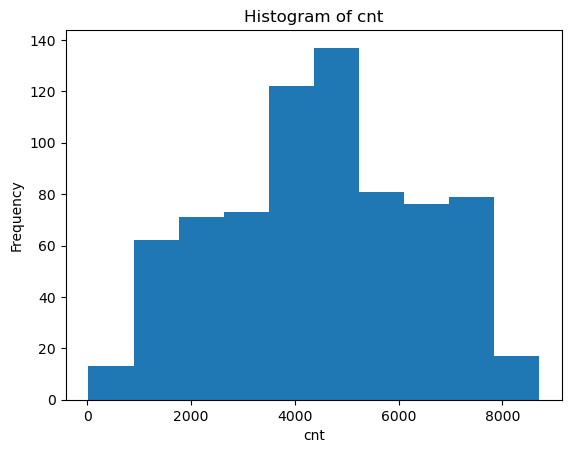

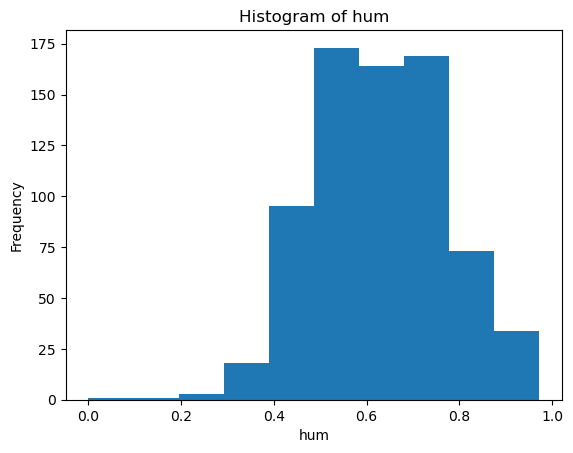

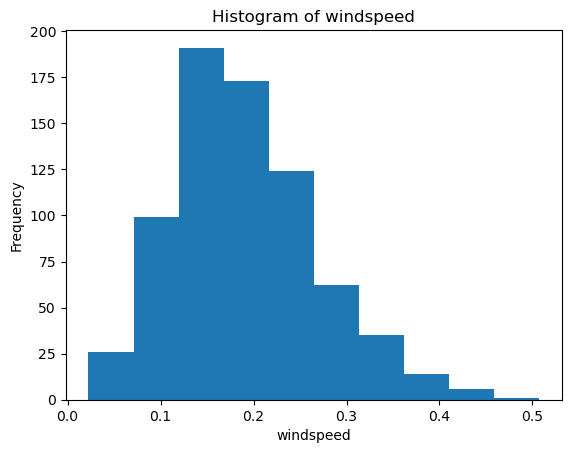

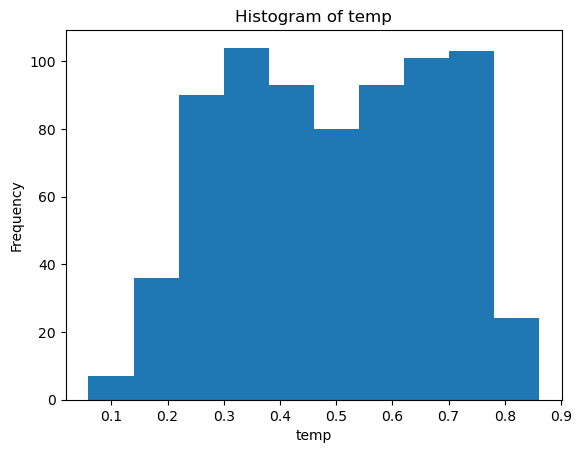

In [296]:
import matplotlib.pyplot as plt

hist_list = ["cnt", "hum", "windspeed", "temp"]

for x in hist_list:
    day_df[x].hist()
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {x}")
    plt.grid(False)
    plt.show()

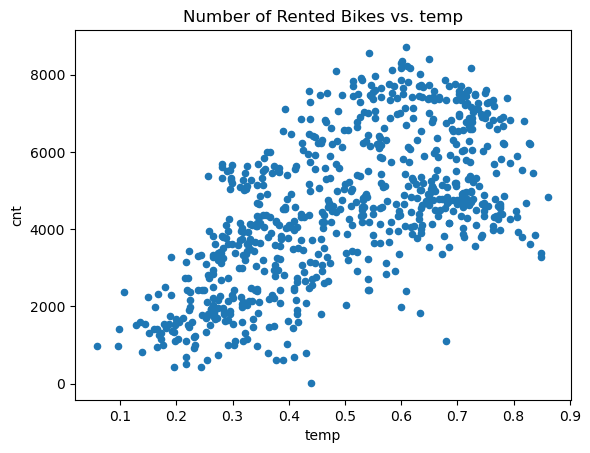

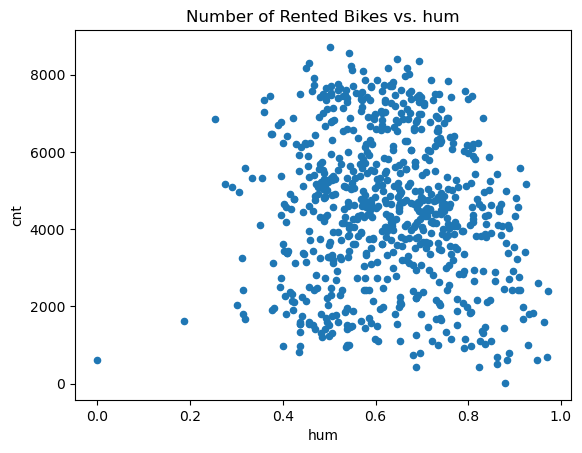

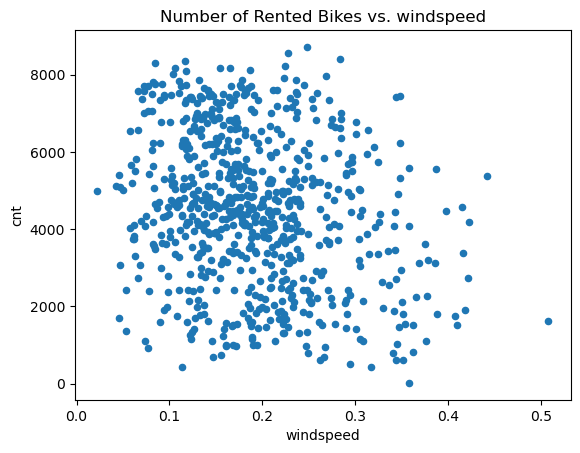

In [297]:
# scatter plots

scatter_list = ["temp", "hum", "windspeed"]

for s in scatter_list:
    day_df.plot.scatter(x=s, y="cnt")
    plt.title(f"Number of Rented Bikes vs. {s}")
    plt.show()

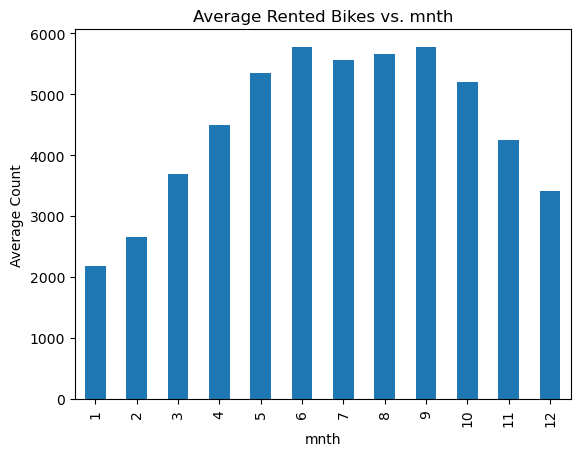

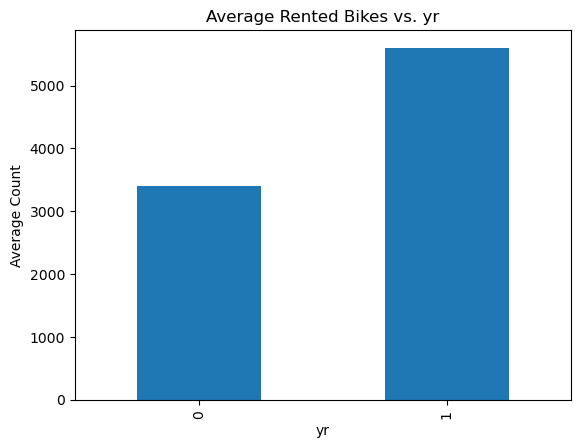

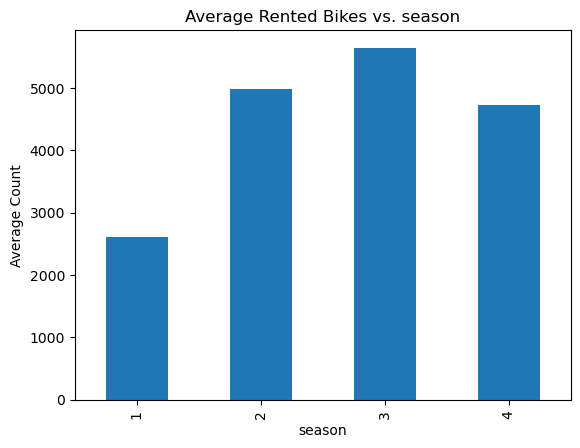

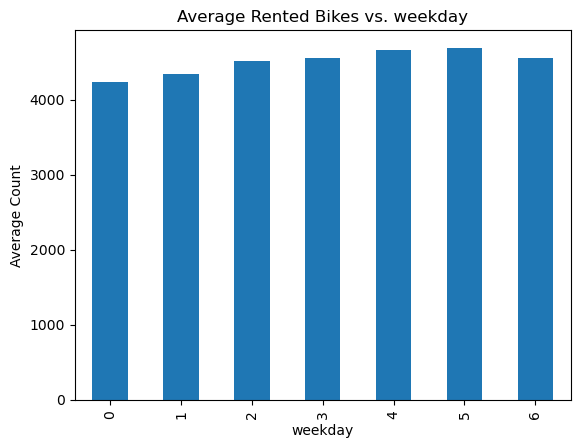

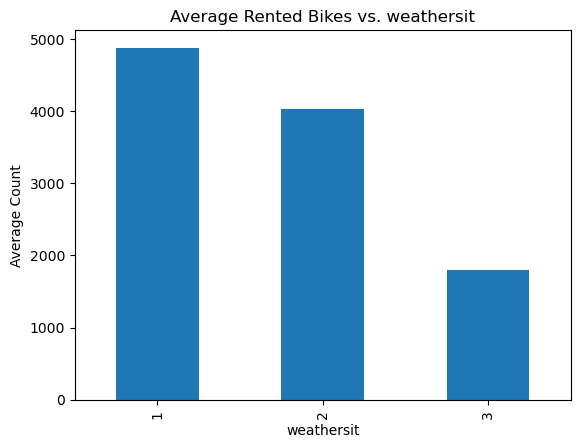

In [298]:
# bar plots

bar_list = ["mnth", "yr", "season", "weekday", "weathersit"]

for b in bar_list:
    day_df.groupby(b)['cnt'].mean().plot.bar() # average number sold in each category
    
    plt.title(f"Average Rented Bikes vs. {b}")
    plt.ylabel("Average Count")
    plt.show()

# 2.1 Model Implementation

To implement the linear regression model, we use the closed-form solution, which seeks to find the weight vector w that minimizes the sum of squared residuals. A crucial first step is the construction of the Design Matrix ($X$), where we append a column of ones to the raw feature set to act as a multiplier for the bias term (intercept), ensuring the model is not forced to pass through the origin. As per the instructions, we avoid matrix inversion to maintain numerical stability. Instead, we use this formula:$$(X^T X)\mathbf{w} = X^T \mathbf{y}$$

In [299]:
class LinearRegression:
    def __init__(self):
        self.weights = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        X: Design matrix (NumPy array)
        y: Target vector (NumPy array)
        """
        # 1. Add the bias term (intercept)
        # Add column of ones as the first column of X
        ones = np.ones((X.shape[0], 1))
        X_design = np.append(ones, X, axis=1)
        
        # 2. Compute the components of the Equation
        # X^T * X
        XTX = X_design.T @ X_design
        # X^T * y
        XTy = X_design.T @ y
        
        # 3. Solve for weights (w)
        self.weights = np.linalg.solve(XTX, XTy)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the target values for the given features.
        """
        # Add the same bias term (ones) for prediction
        ones = np.ones((X.shape[0], 1))
        X_design = np.append(ones, X, axis=1)
        
        # y_hat = X * w
        return X_design @ self.weights
        
        

# 2.2 Train/test split

To ensure the model generalizes well to unseen data, we split the dataset into a training set (80%) and a test set (20%). Since the original data is ordered chronologically by date, we first performed a random shuffle of the data indices. This prevents the model from learning a bias based on time; for example, training only on data from the first year and testing on data from the second year. Shuffling ensures that both the training and test sets contain a representative distribution of seasons, weather conditions, etc. We also set a random seed (21) to ensure that our 'random' shuffle is reproducible, allowing for consistent results across different experimental runs.

In [300]:
# X is our feature set
X = encoded_df.values
# y is our target: the total count of rented bikes
y = day_df['cnt'].values

In [301]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}") 

Shape of X: (731, 29)
Shape of y: (731,)


In [302]:
encoded_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,1,0.253333,0.255046,0.590000,0.155471,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.253333,0.242400,0.752917,0.124383,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1,0,0,0.255833,0.231700,0.483333,0.350754,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [303]:
# 1. Set a random seed for reproducibility 
np.random.seed(21)

In [304]:
# 2. Generate shuffled indices
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

In [305]:
# 3. Calculate the number of samples for training data
TRAINING_DATA_SPLIT = 0.8
training_data_size = int(TRAINING_DATA_SPLIT * num_samples)

In [306]:
# 4. Split the samples between training/test data
train_data_indices = indices[:training_data_size]
test_data_indices = indices[training_data_size:]

In [307]:
# 5. Create the actual datasets
X_train, X_test = X[train_data_indices], X[test_data_indices]
y_train, y_test = y[train_data_indices], y[test_data_indices]

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 584
Test set size: 147


# 2.3 Evaluation metric

Here, we implemented the Mean Squared Error (MSE) as our evaluation metric, which was computed separately for both the training and test datasets. Based on our implementation, we achieved a Training MSE of 562,940 and a Test MSE of 620,802. Comparing these two values allows us to assess the model's ability to generalize. Since the error on the unseen test set is within a similar range as the training error, we can conclude that the model effectively captured the underlying patterns in the data rather than simply memorizing the training samples.

In [308]:
# Get our linear regression model
model = LinearRegression()

In [309]:
# Train model on training data set
model.fit(X=X_train, y=y_train)

In [310]:
# Get predictions on data sets
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [311]:
# Define the MSE function
def calculate_MSE(y_actual, y_pred):
    """
    Compute the Mean Squared Error between actual and predicted values.
    """
    # Formula: 1/n * sum((y_true - y_pred)^2)
    return np.mean((y_actual - y_pred) ** 2)

In [312]:
# Compute the MSE scores
train_mse = calculate_MSE(y_actual=y_train, y_pred=y_hat_train)
test_mse = calculate_MSE(y_actual=y_test, y_pred=y_hat_test)
print(f"MSE on training set: {train_mse}")
print(f"MSE on test set: {test_mse}")

MSE on training set: 562939.9978182801
MSE on test set: 620802.2361993787


# 3.1 Feature engineering

In [313]:
# Our feature for feature engineering
fe_df = encoded_df.copy()
target = day_df['cnt'].copy()
# Continuous variables to use for polynomial features, interaction terms, and simple nonlinear transforms
cont_vars = ["temp","atemp","hum","windspeed"]

for var_i in cont_vars:
    #polynomial features (x^2)
    fe_df[f"{var_i}^2"] = fe_df[var_i]**2
    #interaction terms (x_i x_j)
    for var_j in cont_vars:
        #To avoid duplication of columns (since the value of x_i x_j = x_j x_i)
        if (var_i != var_j) and (f"{var_i} {var_j}" not in fe_df.columns and f"{var_j} {var_i}" not in fe_df.columns):
            fe_df[f"{var_i} {var_j}"] = fe_df[var_i] * fe_df[var_j]


    #simple nonlinear transforms log(x)
    #Log transformation iff we have restrictly positive numbers in a feature
    if (fe_df[var_i] > 0).all():
        fe_df[f"log({var_i})"] = np.log(fe_df[var_i])


# 3.2 Model retraining and analysis

In [314]:
#Redoing the LinearRegression on the feature engineered data frame and normalization
X_fe = fe_df.values
y_fe = day_df['cnt'].values
np.random.seed(21)
num_samples_fe = X_fe.shape[0]
indices_fe = np.arange(num_samples_fe)
np.random.shuffle(indices_fe)
training_data_size = int(TRAINING_DATA_SPLIT * num_samples_fe)
train_data_indices = indices_fe[:training_data_size]
test_data_indices = indices_fe[training_data_size:]
X_train, X_test = X_fe[train_data_indices], X_fe[test_data_indices]
y_train, y_test = y_fe[train_data_indices], y_fe[test_data_indices]
#Normalizing our test data set after adding new features
scalar = StandardScaler()
#Normalizing the training set
X_train = scalar.fit_transform(X_train)
#Normalizing the test using the value of mean and standard deviation of our training set
X_test = scalar.transform(X_test)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
model = LinearRegression()
model.fit(X=X_train, y=y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
train_mse_fe = calculate_MSE(y_actual=y_train, y_pred=y_hat_train)
test_mse_fe = calculate_MSE(y_actual=y_test, y_pred=y_hat_test)
print(f"MSE on training set after feature engineering: {train_mse_fe}")
print(f"MSE on test set after feature engineering: {test_mse_fe}")
print(f"MSE on training set: {train_mse}")
print(f"MSE on test set: {test_mse}")

Training set size: 584
Test set size: 147
MSE on training set after feature engineering: 403392.2410496637
MSE on test set after feature engineering: 463275.90983887046
MSE on training set: 562939.9978182801
MSE on test set: 620802.2361993787
